NAME - Kanchana c


USN-1AJ22EC022

Branch-ECE

Gmail-kanchanac1914@gmail.com

collage-Cambridge institute of technology north campus

Project name - delivary Time estimation using distance, traffic and shipment density


AIM -to develop a predictive model for Delivery Time Estimation using key influencing factors such as distance, traffic conditions, and shipment density. The system analyzes historical delivery data and applies machine learning techniques to accurately estimate the expected delivery time.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

To upload data sets

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/delivery_time (1).csv')

to find the size of the dataset.

In [ ]:
df.shape

to get a summary of the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   distance_km              963 non-null    float64
 1   traffic_density          953 non-null    object 
 2   shipment_weight_kg       950 non-null    float64
 3   shipment_volume_m3       943 non-null    float64
 4   delivery_type            950 non-null    object 
 5   vehicle_type             944 non-null    object 
 6   route_complexity         941 non-null    object 
 7   weather_conditions       956 non-null    object 
 8   time_of_day              934 non-null    object 
 9   loading_time_minutes     950 non-null    float64
 10  driver_experience_years  955 non-null    float64
 11  urban_rural              948 non-null    object 
 12  traffic_incidents        622 non-null    object 
 13  holiday_period           958 non-null    object 
 14  delivery_time_hours      

this is the code to  creates a Box Plot
This helps you visualize the distribution and detect outliers in delivery time.

Delivery Time vs Distance

It creates a box plot comparison between:

X-axis → traffic_density

Y-axis → delivery_time_hours

Delivery Time vs Traffic Density

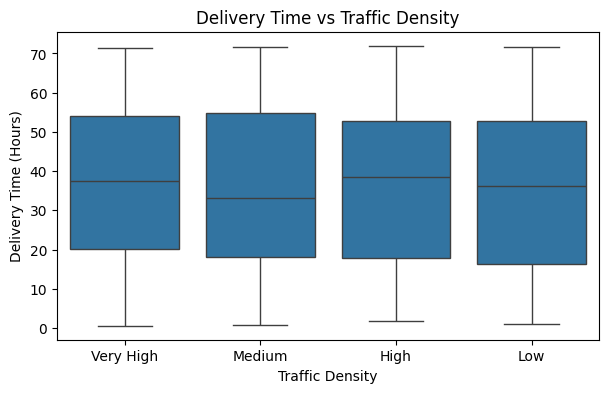

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.boxplot(
    x=df['traffic_density'],
    y=df['delivery_time_hours']
)
plt.title('Delivery Time vs Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Delivery Time (Hours)')
plt.show()

this is the code to creates a box plot to analyze the distribution of shipment weight.

Delivery Time vs Shipment Weight

here i am converting continuous shipment weight into 3 categories:
Light
Medium
Heavy

Shipment Weight vs Delivery Time (Grouped)

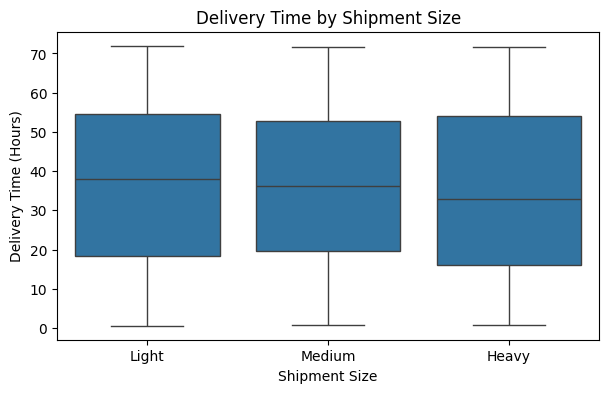

In [ ]:
# Create shipment size category
df['shipment_size_category'] = pd.qcut(
    df['shipment_weight_kg'],
    q=3,
    labels=['Light', 'Medium', 'Heavy']
)

plt.figure(figsize=(7,4))
sns.boxplot(
    x=df['shipment_size_category'],
    y=df['delivery_time_hours']
)
plt.title('Delivery Time by Shipment Size')
plt.xlabel('Shipment Size')
plt.ylabel('Delivery Time (Hours)')
plt.show()


The box plot shows that adverse weather conditions like rain or storms increase delivery time compared to clear weather conditions.

Delivery Time vs Weather Conditions

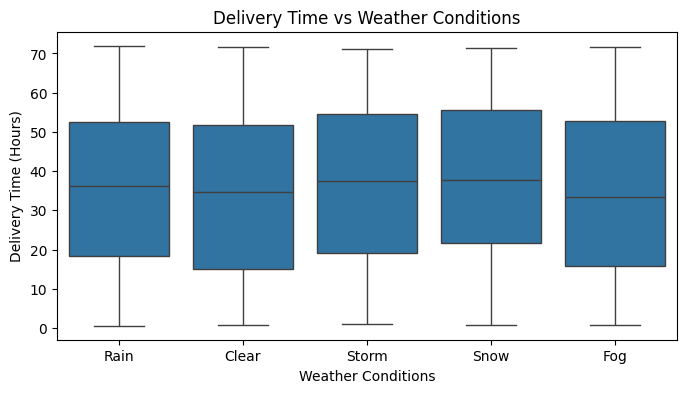

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x=df['weather_conditions'],
    y=df['delivery_time_hours']
)
plt.title('Delivery Time vs Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Delivery Time (Hours)')
plt.show()


it gives a statistical summary of all numerical columns in your dataset.

In [ ]:
df.describe()

,distance_km,shipment_weight_kg,shipment_volume_m3,loading_time_minutes,driver_experience_years,delivery_time_hours
count,963.000000,950.000000,943.000000,950.000000,955.000000,955.000000
mean,490.787348,254.526484,2.514590,32.237996,15.508294,35.982596
std,284.723392,146.569229,1.424140,15.912016,8.711642,20.722147
min,4.592468,0.879500,0.018911,5.026750,0.515941,0.556579
25%,240.119417,126.014252,1.290523,17.829166,8.043133,18.021190
50%,489.800066,266.609987,2.453560,32.616960,15.436557,35.815454
75%,737.646917,386.039989,3.771147,45.943442,22.974640,53.754303
max,996.775431,499.459562,4.984576,59.968202,29.978767,71.983891


this is the code to converts categorical (text) columns into numerical values.
Because Machine Learning models cannot understand text — they only understand numbers.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Define cat_cols here to fix the NameError
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

It standardizes all numerical columns so that:
Mean = 0
Standard Deviation = 1

This process is called Standardization (Z-score normalization).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Define num_cols by selecting numerical columns from the DataFrame
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

The bar chart represents the distribution of delivery time categories. It shows how many deliveries were on-time, delayed, or late. This helps analyze delivery performance and identify areas for improvement.”


Category Counts:

delivery_time_category
1    362
0    324
2    314
Name: count, dtype: int64


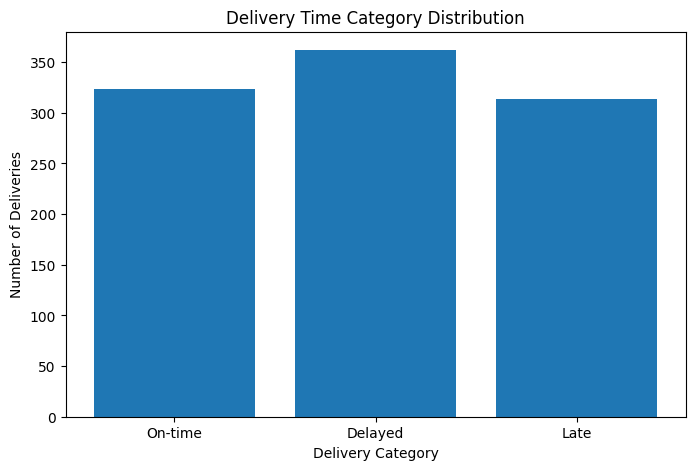

In [ ]:
# ==========================================
# COMPLETE CLEAN WORKING PIPELINE (SAFE)
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1️⃣ Reload Original Dataset
# -------------------------------

df = pd.read_csv("delivery_time (1).csv")   # 🔴 change to your file name

# -------------------------------
# 2️⃣ Handle Missing Values
# -------------------------------

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# -------------------------------
# 3️⃣ Create Delivery Category (BEFORE SCALING)
# -------------------------------

def categorize_delivery(time):
    if time < 24:
        return 0   # On-time
    elif time <= 48:
        return 1   # Delayed
    else:
        return 2   # Late

df['delivery_time_category'] = df['delivery_time_hours'].apply(categorize_delivery)

print("\nCategory Counts:\n")
print(df['delivery_time_category'].value_counts())

# -------------------------------
# 4️⃣ Plot Bar Graph
# -------------------------------

plt.figure(figsize=(8,5))
plt.bar(['On-time','Delayed','Late'],
        df['delivery_time_category'].value_counts().sort_index())

plt.title("Delivery Time Category Distribution")
plt.xlabel("Delivery Category")
plt.ylabel("Number of Deliveries")

plt.show()

# -------------------------------
# 5️⃣ Encode Categorical Features
# -------------------------------

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

The scatter plot shows the relationship between distance and delivery time. As distance increases, delivery time increases. The color coding shows delivery categories, indicating that longer distances are more likely to result in delayed or late deliveries.”

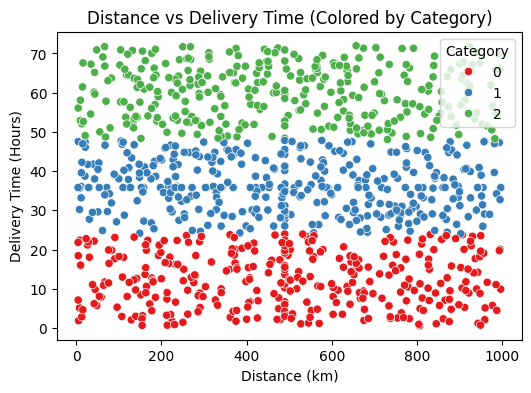

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.scatterplot(
    x='distance_km',
    y='delivery_time_hours',
    hue='delivery_time_category',
    palette='Set1',
    data=df
)

plt.title('Distance vs Delivery Time (Colored by Category)')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (Hours)')
plt.legend(title='Category')
plt.show()


A histogram shows the distribution of a continuous variable.
This code creates a histogram to visualize the distribution of delivery times.

It sets the figure size to 6 × 4 inches.

It plots a histogram of the delivery_time_hours column.

The data is divided into 30 bins (bars).
A KDE curve is added to show a smooth distribution trend.

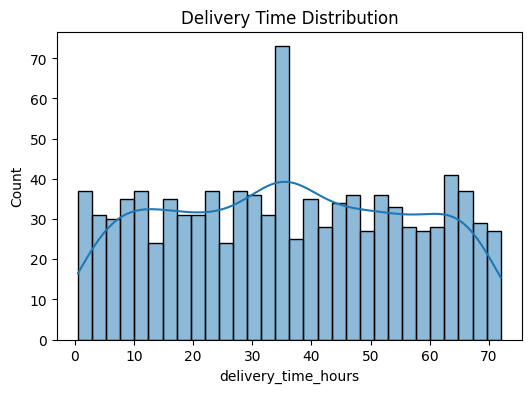

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['delivery_time_hours'], bins=30, kde=True)
plt.title('Delivery Time Distribution')
plt.show()

It helps you understand: This code creates a correlation heatmap to visualize the relationships between numerical features in the dataset.Warm colors (red) → Strong positive correlation (+1)(Means both variables move in the same direction.)

Cool colors (blue) → Strong negative correlation (−1)
(Means variables move in opposite directions.)



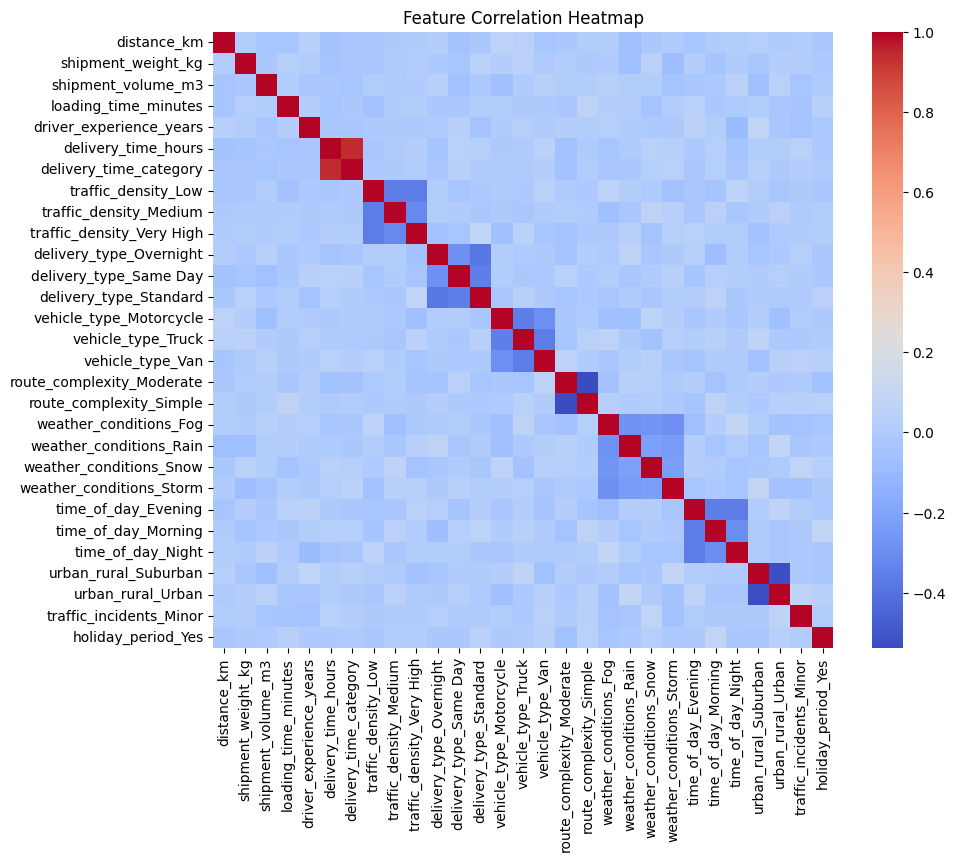

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

splits data into training and testing sets

Parameters:

test_size=0.2 → 20% of data goes into testing, 80% into training

random_state=42 → ensures the split is reproducible (same every time)

Output:

X_train, y_train → used to train the model

X_test, y_test → used to evaluate the model

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['delivery_time_hours','delivery_time_category'], axis=1)
y = df['delivery_time_hours']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


LinearRegression → builds a linear regression model (predicts target as a linear combination of features).

mean_squared_error → calculates how far your predictions are from actual values (lower is better).

r2_score → coefficient of determination (how well your model explains the data).

1 → perfect prediction

0 → model predicts no better than the mean

Negative → model is worse than predicting the mean

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 389.0350634359278
R2 Score: -0.005205376320485122


This code builds and evaluates a Random Forest classification model to predict delivery time categories.
Accuracy → Overall correct predictions percentage.

Classification Report includes:

Precision → How many predicted positives are correct.

Recall → How many actual positives were correctly predicted.

F1-score → Balance between precision & recall.

Support → Number of actual samples per class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(['delivery_time_hours','delivery_time_category'], axis=1)
y = df['delivery_time_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.37
              precision    recall  f1-score   support

           0       0.39      0.45      0.42        58
           1       0.40      0.40      0.40        80
           2       0.30      0.26      0.28        62

    accuracy                           0.37       200
   macro avg       0.36      0.37      0.36       200
weighted avg       0.37      0.37      0.37       200



This code builds a Sequential neural network model with two hidden layers using ReLU activation(Rectified Linear Unit.) and a softmax output layer for multiclass classification. The target variable is one-hot encoded. The model is compiled using the Adam optimizer and categorical crossentropy loss function. Finally, the model summary displays the architecture details.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# One-hot encode target+
y_cat = to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42
)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,971 (15.51 KB)

 Trainable params: 3,971 (15.51 KB)

 Non-trainable params: 0 (0.00 B)

This code trains the neural network model.

It trains the model 50 times over the full dataset (epochs = 50).

It processes 32 data samples at a time (batch_size = 32).

It keeps 20% of training data to check performance while training (validation_split = 0.2).

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3229 - loss: 8.0154 - val_accuracy: 0.3438 - val_loss: 2.1256
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3422 - loss: 2.1646 - val_accuracy: 0.3313 - val_loss: 1.8763
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3373 - loss: 1.6875 - val_accuracy: 0.3500 - val_loss: 1.8939
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3413 - loss: 1.8066 - val_accuracy: 0.3438 - val_loss: 1.3904
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3696 - loss: 1.5554 - val_accuracy: 0.3187 - val_loss: 1.2808
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3833 - loss: 1.3087 - val_accuracy: 0.3375 - val_loss: 1.3957
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3625 - loss: 1.4397 - val_accuracy: 0.3250 - val_loss: 1.3582
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3900 - loss: 1.3450 - val_accuracy: 0.3000 - val_loss

This code checks how well the trained neural network performs on the test data

→ Tests the model using unseen data.
→ Returns loss and accuracy.

→ Displays the model’s accuracy score.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3033 - loss: 1.4406  
Neural Network Accuracy: 0.30000001192092896


In [ ]:
!pip install gradio scikit-learn pandas numpy


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("delivery_time (1).csv")

# 1. Handle Missing Numerical Values (mean imputation)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# 2. Handle Missing Categorical Values (mode imputation)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3. Create shipment size category
df['shipment_size_category'] = pd.qcut(
    df['shipment_weight_kg'],
    q=3,
    labels=['Light', 'Medium', 'Heavy']
)

# 4. One-hot encode all categorical features
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object', 'category']).columns, drop_first=True)

# Features and Target
# Drop original 'shipment_weight_kg' as it's now represented by 'shipment_size_category' via one-hot encoding
X = df.drop(['delivery_time_hours', 'shipment_weight_kg'], axis=1)
y = df['delivery_time_hours']

# Train Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

print("Model trained successfully ✅")

Model trained successfully ✅


In [ ]:
!pip install gradio


deployment of project by using gradio

In [ ]:


import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import gradio as gr

# Load Dataset
df = pd.read_csv("delivery_time (1).csv")

# 1. Handle Missing Numerical Values (mean imputation)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# 2. Handle Missing Categorical Values (mode imputation)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3. Create shipment size category
df['shipment_size_category'] = pd.qcut(
    df['shipment_weight_kg'],
    q=3,
    labels=['Light', 'Medium', 'Heavy']
)

# 4. One-hot encode all categorical features
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object', 'category']).columns, drop_first=True)

# Features and Target
# Drop original 'shipment_weight_kg' as it's now represented by 'shipment_size_category' via one-hot encoding
X = df.drop(['delivery_time_hours', 'shipment_weight_kg'], axis=1)
y = df['delivery_time_hours']

# Store feature names for consistent input to the model during prediction
model_features = X.columns.tolist()

# Train Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

# Prediction Function
def predict_delivery_time(distance, traffic, shipment):

    # Create an empty DataFrame with the same columns as the training data
    input_df = pd.DataFrame(0, index=[0], columns=model_features)

    # Populate input_df with values from the form
    input_df['distance_km'] = distance

    # Map traffic input to one-hot encoded columns
    # Assuming traffic 'Low' (index 0) is the base case (all related one-hot cols are 0)
    if traffic == "Medium":
        if 'traffic_density_Medium' in input_df.columns:
            input_df['traffic_density_Medium'] = 1
    elif traffic == "High":
        # Assuming 'High' corresponds to 'traffic_density_High'
        if 'traffic_density_High' in input_df.columns:
            input_df['traffic_density_High'] = 1
        # Fallback if 'Very High' was also an option and not dropped
        elif 'traffic_density_Very High' in input_df.columns:
            input_df['traffic_density_Very High'] = 1

    # Map shipment input to one-hot encoded columns (Light, Medium, Heavy)
    # Assuming 'Small' maps to 'Light' (index 0) as the base case
    if shipment == "Medium":
        if 'shipment_size_category_Medium' in input_df.columns:
            input_df['shipment_size_category_Medium'] = 1
    elif shipment == "Large":
        if 'shipment_size_category_Heavy' in input_df.columns:
            input_df['shipment_size_category_Heavy'] = 1

    # Make prediction
    prediction = model.predict(input_df)

    return f"Estimated Delivery Time: {prediction[0]:.2f} Hours"

# Gradio Interface
interface = gr.Interface(
    fn=predict_delivery_time,
    inputs=[
        gr.Number(label="Distance (km)"),
        gr.Radio(["Low", "Medium", "High"], label="Traffic Density"),
        gr.Radio(["Small", "Medium", "Large"], label="Shipment Size")
    ],
    outputs="text",
    title="🚚 Delivery Time Estimation",
    description="Predict delivery time using Distance, Traffic Density, and Shipment Size"
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c189b1b4e5a78a38c6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import gradio as gr

# ==============================
# Load Dataset
# ==============================
df = pd.read_csv("delivery_time (1).csv")

# ==============================
# 1. Handle Missing Values
# ==============================

# Numerical columns → mean imputation
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Categorical columns → mode imputation
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# ==============================
# 2. Create Shipment Size Category
# ==============================
df['shipment_size_category'] = pd.qcut(
    df['shipment_weight_kg'],
    q=3,
    labels=['Light', 'Medium', 'Heavy'],
    duplicates='drop'   # prevents binning error
)

# ==============================
# 3. One-Hot Encoding
# ==============================
df = pd.get_dummies(
    df,
    columns=df.select_dtypes(include=['object', 'category']).columns,
    drop_first=True
)

# ==============================
# 4. Features and Target
# ==============================
X = df.drop(columns=['delivery_time_hours', 'shipment_weight_kg'], errors='ignore')
y = df['delivery_time_hours']

# Store feature names
model_features = X.columns.tolist()

# ==============================
# 5. Train Model
# ==============================
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

# ==============================
# 6. Prediction Function (Fixed)
# ==============================
def predict_delivery_time(distance, traffic, shipment):

    # Create temporary dataframe
    temp_df = pd.DataFrame({
        'distance_km': [distance],
        'traffic_density': [traffic],
        'shipment_size_category': [shipment]
    })

    # One-hot encode
    temp_df = pd.get_dummies(temp_df)

    # Ensure same columns as training data
    temp_df = temp_df.reindex(columns=model_features, fill_value=0)

    # Predict
    prediction = model.predict(temp_df)

    return f"Estimated Delivery Time: {prediction[0]:.2f} Hours"

# ==============================
# 7. Gradio Interface
# ==============================
interface = gr.Interface(
    fn=predict_delivery_time,
    inputs=[
        gr.Number(label="Distance (km)"),
        gr.Radio(["Low", "Medium", "High"], label="Traffic Density"),
        gr.Radio(["Light", "Medium", "Heavy"], label="Shipment Size")
    ],
    outputs="text",
    title="🚚 Delivery Time Estimation",
    description="Predict delivery time using Distance, Traffic Density, and Shipment Size"
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fbf7441a1381a9aee3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
